# EDA Predicción de Brotes

In [2]:
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns

uploaded = files.upload()
data = pd.read_csv('Data_Including_All_Countries.csv', sep=',') # Added sep=';' to specify semicolon as the delimiter

print(data.head())

Saving Data_Including_All_Countries.csv to Data_Including_All_Countries.csv
   Unnamed: 0   AÑO         PAÍS  \
0           0  2010  Afghanistan   
1           1  2010      Albania   
2           2  2010      Algeria   
3           3  2010      Andorra   
4           4  2010       Angola   

  Incidencia de la tuberculosos (por cada 100000 personas por año)  \
0                                                189                 
1                                                 17                 
2                                                 78                 
3                                                 11                 
4                                                384                 

  Nuevas infecciones VIH (por cada 1000 personas no infectadas)   \
0                                               0.07               
1                                               0.08               
2                                               0.08               
3             

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 22 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Unnamed: 0                                                                                            1389 non-null   int64  
 1   AÑO                                                                                                   1389 non-null   int64  
 2   PAÍS                                                                                                  1389 non-null   object 
 3   Incidencia de la tuberculosos (por cada 100000 personas por año)                                      1386 non-null   object 
 4   Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                         

In [4]:
# Eliminar la columna 'Unnamed: 0' que parece ser un índice innecesario
data_cleaned = data.drop(columns=['Unnamed: 0'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 21 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   AÑO                                                                                                   1389 non-null   int64  
 1   PAÍS                                                                                                  1389 non-null   object 
 2   Incidencia de la tuberculosos (por cada 100000 personas por año)                                      1386 non-null   object 
 3   Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                         1386 non-null   object 
 4   Médicos (por cada 10000 personas)                                                                     

In [5]:
data_cleaned.head()

,AÑO,PAÍS,Incidencia de la tuberculosos (por cada 100000 personas por año),Nuevas infecciones VIH (por cada 1000 personas no infectadas),Médicos (por cada 10000 personas),Personal de enfermería y obsetricia (por cada 10000 personas),Farmacistas (por cada 10000 personas),Camas Hospitalarias c/1000 Personas,Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional,Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas),...,Población que utiliza al menos servicios básicos de saneamiento (%),Coordinación,Vigilancia,Químico,Seguridad alimentaria,Respuesta,Laboratorio,Comunicación de riesgos,Preparación,Cobertura de tratamiento de Tuberculosis
0,2010,Afghanistan,189,0.07,2.448,NO DATA,0.289,4.300,45.0,253.971100,...,35.47747,75.0,96.0,7.0,26.0,53.0,45.0,80.0,41.0,53
1,2010,Albania,17,0.08,12.494,40.66,4.545,29.893,NaN,103.060280,...,95.17216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
2,2010,Algeria,78,0.08,NaN,NaN,NaN,NaN,51.0,104.116915,...,86.97813,56.0,64.0,14.0,60.0,46.0,35.0,30.0,46.0,80
3,2010,Andorra,11,NO DATA,NaN,NaN,NaN,NaN,36.0,NaN,...,100.00000,65.0,68.0,7.0,80.0,40.0,35.0,70.0,12.0,87
4,2010,Angola,384,3.28,NaN,NaN,NaN,NaN,NaN,270.244250,...,41.06079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50


In [6]:
# Reemplazar valores "NO DATA" por NaN para tratar faltantes de manera uniforme
data_cleaned = data_cleaned.replace("NO DATA", pd.NA)

data_cleaned.head()
data_cleaned.info()
data_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 21 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   AÑO                                                                                                   1389 non-null   int64  
 1   PAÍS                                                                                                  1389 non-null   object 
 2   Incidencia de la tuberculosos (por cada 100000 personas por año)                                      1385 non-null   object 
 3   Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                         938 non-null    object 
 4   Médicos (por cada 10000 personas)                                                                     

,AÑO,Camas Hospitalarias c/1000 Personas,Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional,Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas),Población que utiliza al menos servicios básicos de saneamiento (%),Coordinación,Vigilancia,Químico,Seguridad alimentaria,Respuesta,Laboratorio,Comunicación de riesgos,Preparación
count,1389.000000,778.000000,985.000000,1281.000000,1364.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2013.004320,34.268494,69.035533,172.622962,73.751730,75.807460,80.520161,52.135081,73.467742,79.061492,76.886089,72.547379,64.936492
std,2.001076,24.934516,21.180068,95.134139,28.757246,24.386234,19.597916,35.756773,28.179240,21.370955,23.510912,27.734829,30.754537
min,2010.000000,0.120000,1.000000,48.963545,5.883670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,15.032015,54.000000,97.817750,50.715665,57.000000,70.000000,15.000000,53.000000,65.750000,61.000000,57.000000,42.000000
50%,2013.000000,28.300000,72.000000,152.441850,86.865040,83.000000,85.000000,54.000000,80.000000,85.000000,86.000000,80.000000,70.500000
75%,2015.000000,47.045000,86.000000,229.722200,97.102608,100.000000,95.000000,85.000000,100.000000,95.000000,96.000000,100.000000,92.000000
max,2016.000000,143.000000,100.000000,670.760250,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
# Ver valores nulos
print(data_cleaned.isnull().sum())

AÑO                                                                                                        0
PAÍS                                                                                                       0
Incidencia de la tuberculosos (por cada 100000 personas por año)                                           4
Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                            451
Médicos (por cada 10000 personas)                                                                        600
Personal de enfermería y obsetricia (por cada 10000 personas)                                            535
Farmacistas (por cada 10000 personas)                                                                    739
Camas Hospitalarias c/1000 Personas                                                                      611
Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional                   404
Radio de mortalidad

Dada la cantidad de valores nulos en la columna "Numero de muertes reportadas por cólera", "Farmacistas" y otros aquellos en donde más del 50% de los datos son nulos, estas serán eliminadas. Por otra parte aquellos que no, se optará por rellenarlos según la naturaleza de los datos.

In [8]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = data_cleaned.isnull().mean() * 100

# Filtrar y eliminar las columnas que tienen más del 50% de valores nulos
data_noNull = data_cleaned.loc[:, null_percentage <= 50]

# Mostrar las columnas restantes
print(data_noNull.columns)
data_noNull.info()

Index(['AÑO', 'PAÍS',
       'Incidencia de la tuberculosos (por cada 100000 personas por año)',
       'Nuevas infecciones VIH (por cada 1000 personas no infectadas) ',
       'Médicos (por cada 10000 personas)',
       'Personal de enfermería y obsetricia (por cada 10000 personas)',
       'Camas Hospitalarias c/1000 Personas',
       'Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional',
       'Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas)',
       'Población que utiliza al menos servicios básicos de saneamiento (%)',
       'Coordinación', 'Vigilancia', 'Químico', 'Seguridad alimentaria',
       'Respuesta', 'Laboratorio', 'Comunicación de riesgos', 'Preparación',
       'Cobertura de tratamiento de Tuberculosis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 19 columns):
 #   Column                                        

In [9]:
# Rellenar los valores nulos
data_rellena = data_noNull.fillna(data_noNull.median(numeric_only=True)) #Relleno de datos con la mediana

data_rellena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 19 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   AÑO                                                                                                   1389 non-null   int64  
 1   PAÍS                                                                                                  1389 non-null   object 
 2   Incidencia de la tuberculosos (por cada 100000 personas por año)                                      1385 non-null   object 
 3   Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                         938 non-null    object 
 4   Médicos (por cada 10000 personas)                                                                     

Se observan columnas que aún presentan valores nulos y que son de la característica "object". Estos serán rellenados con el valor más frecuente.

In [10]:
# Rellenar las columnas no numéricas (object) con el valor más frecuente
data_filled2 = data_rellena.fillna(data_rellena.mode().iloc[0])
data_actual = data_filled2

# Verificar si aún quedan valores nulos
print(data_actual.isnull().sum())
data_actual.info()
data_actual.describe()

AÑO                                                                                                     0
PAÍS                                                                                                    0
Incidencia de la tuberculosos (por cada 100000 personas por año)                                        0
Nuevas infecciones VIH (por cada 1000 personas no infectadas)                                           0
Médicos (por cada 10000 personas)                                                                       0
Personal de enfermería y obsetricia (por cada 10000 personas)                                           0
Camas Hospitalarias c/1000 Personas                                                                     0
Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional                  0
Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas)    0
Población que utiliza al menos servicios básic

,AÑO,Camas Hospitalarias c/1000 Personas,Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional,Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas),Población que utiliza al menos servicios básicos de saneamiento (%),Coordinación,Vigilancia,Químico,Seguridad alimentaria,Respuesta,Laboratorio,Comunicación de riesgos,Preparación
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,2013.004320,31.643044,69.897768,171.053804,73.987750,77.863211,81.800576,52.668107,75.334773,80.758819,79.491001,74.677466,66.526638
std,2.001076,18.889858,17.884022,91.517826,28.550403,20.860522,16.683003,30.225211,23.992994,18.256226,20.288608,23.675969,26.108080
min,2010.000000,0.120000,1.000000,48.963545,5.883670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,26.000000,62.000000,102.652760,51.470740,70.000000,80.000000,31.000000,67.000000,76.000000,73.000000,70.000000,53.000000
50%,2013.000000,28.300000,72.000000,152.441850,86.865040,83.000000,85.000000,54.000000,80.000000,85.000000,86.000000,80.000000,70.500000
75%,2015.000000,30.900000,81.000000,220.236100,96.989590,90.000000,95.000000,77.000000,93.000000,94.000000,92.000000,90.000000,83.000000
max,2016.000000,143.000000,100.000000,670.760250,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


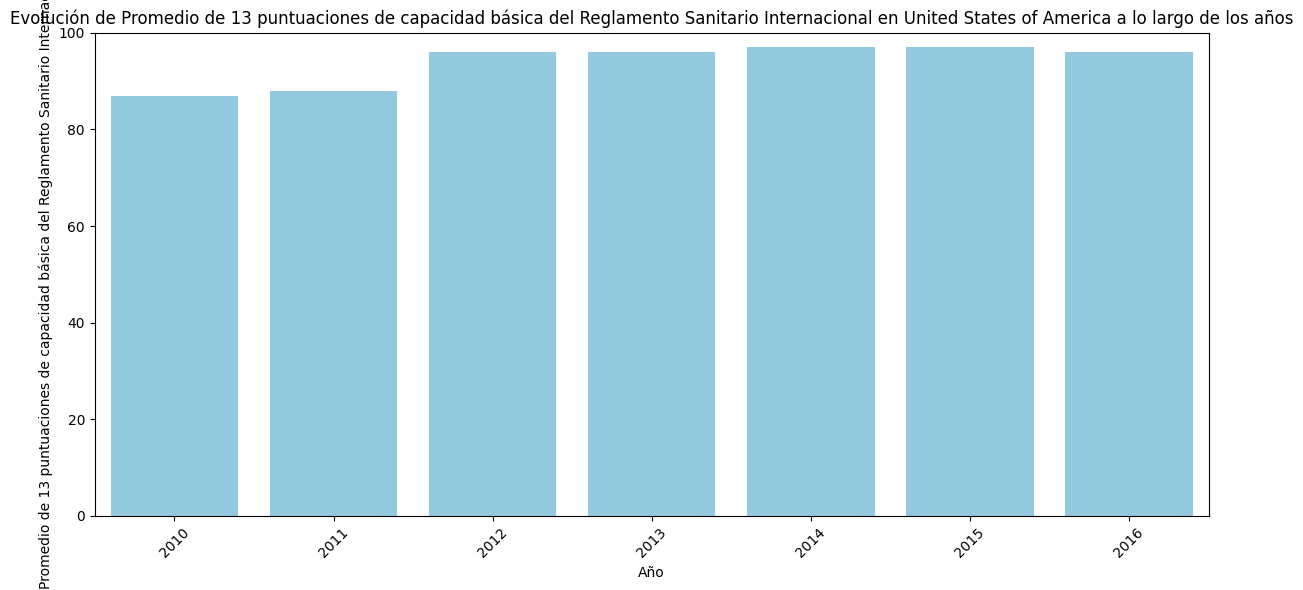

In [11]:
# Parámetros de entrada
pais_deseado = 'United States of America'  # Reemplazar con el país a observar
atributo_deseado = 'Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional'  # Atributo para el gráfico

# Filtrar el DataFrame para el país deseado
data_filtrada = data_actual[data_actual['PAÍS'] == pais_deseado]

# Crear el gráfico de barras con todos los años disponibles
plt.figure(figsize=(12,6))
sns.barplot(x='AÑO', y=atributo_deseado, data=data_filtrada, color="skyblue")

# Título y etiquetas
plt.title(f'Evolución de {atributo_deseado} en {pais_deseado} a lo largo de los años')
plt.xlabel('Año')
plt.ylabel(atributo_deseado)

# Ajustar el rango del eje Y de 0 a 100 para una visualización estándar de los datos en cuanto a ejes se trata
plt.ylim(0, 100)

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que se vean bien todas las etiquetas
plt.show()

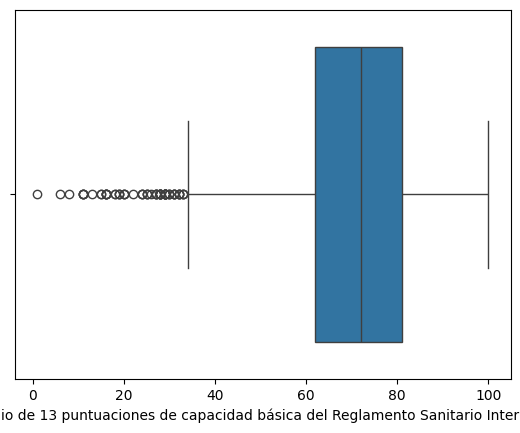

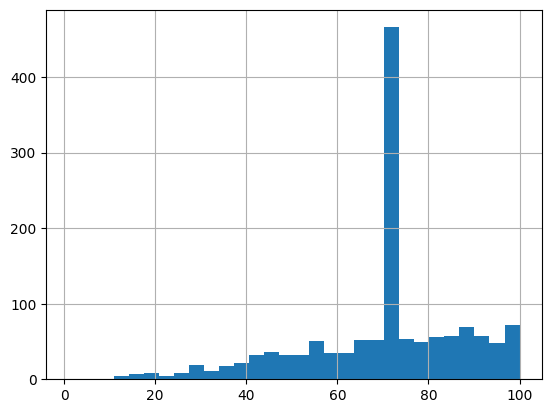

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para una variable numérica
sns.boxplot(x=data_actual['Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional'])
plt.show()

print("")

data_actual['Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional'].hist(bins=30)
plt.show()

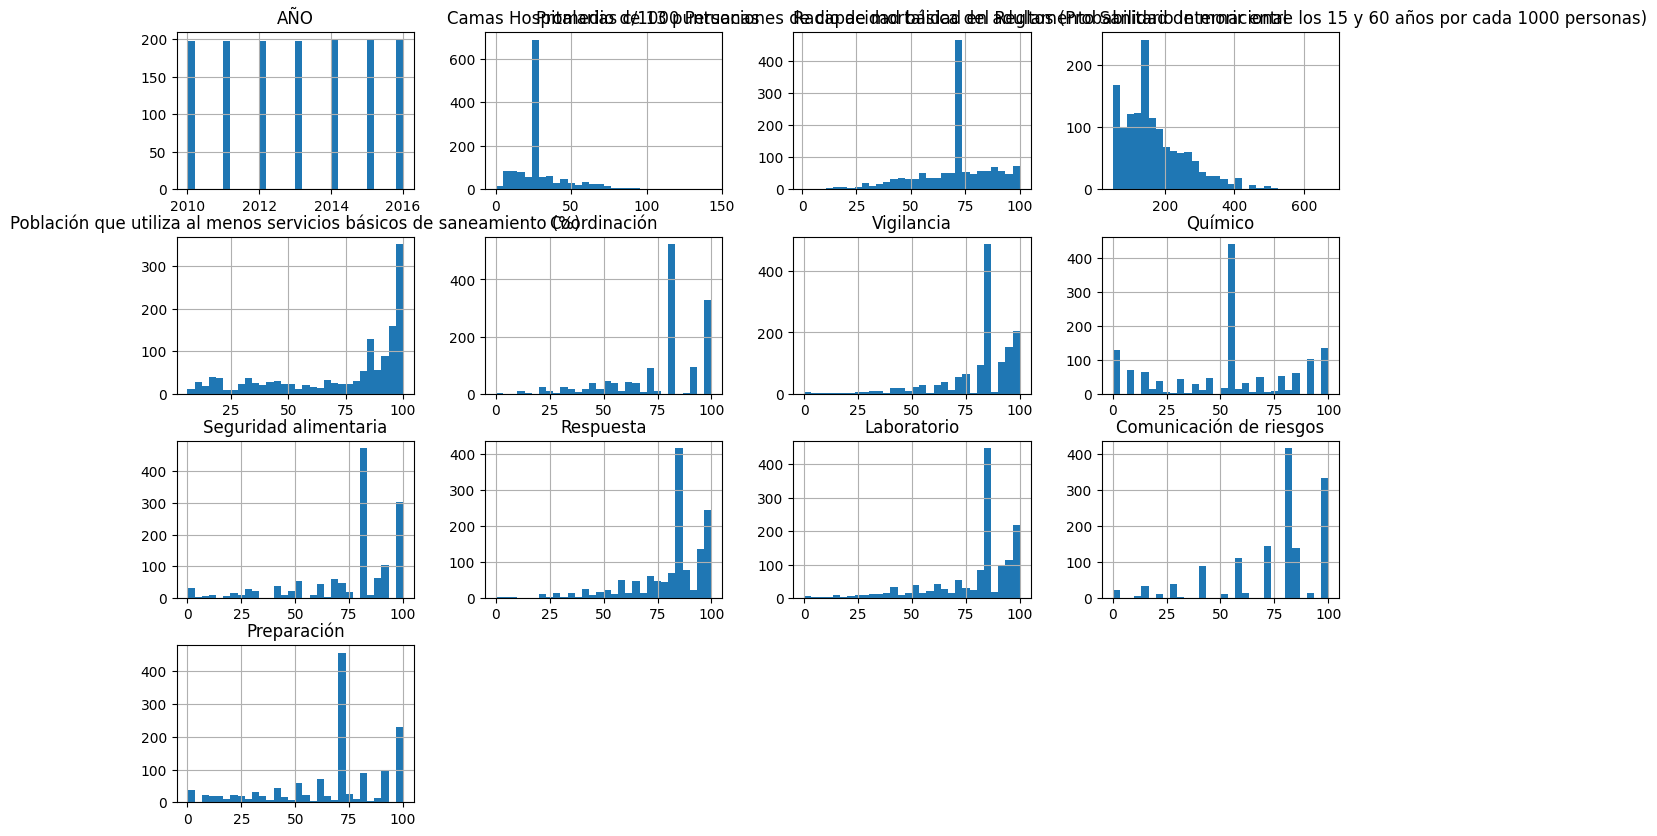

In [13]:
# Histograma para todas las variables numéricas
data_actual.hist(bins=30, figsize=(15, 10))
plt.show()

<ipython-input-14-d2da9e2abb12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico.replace('?', pd.NA, inplace=True)


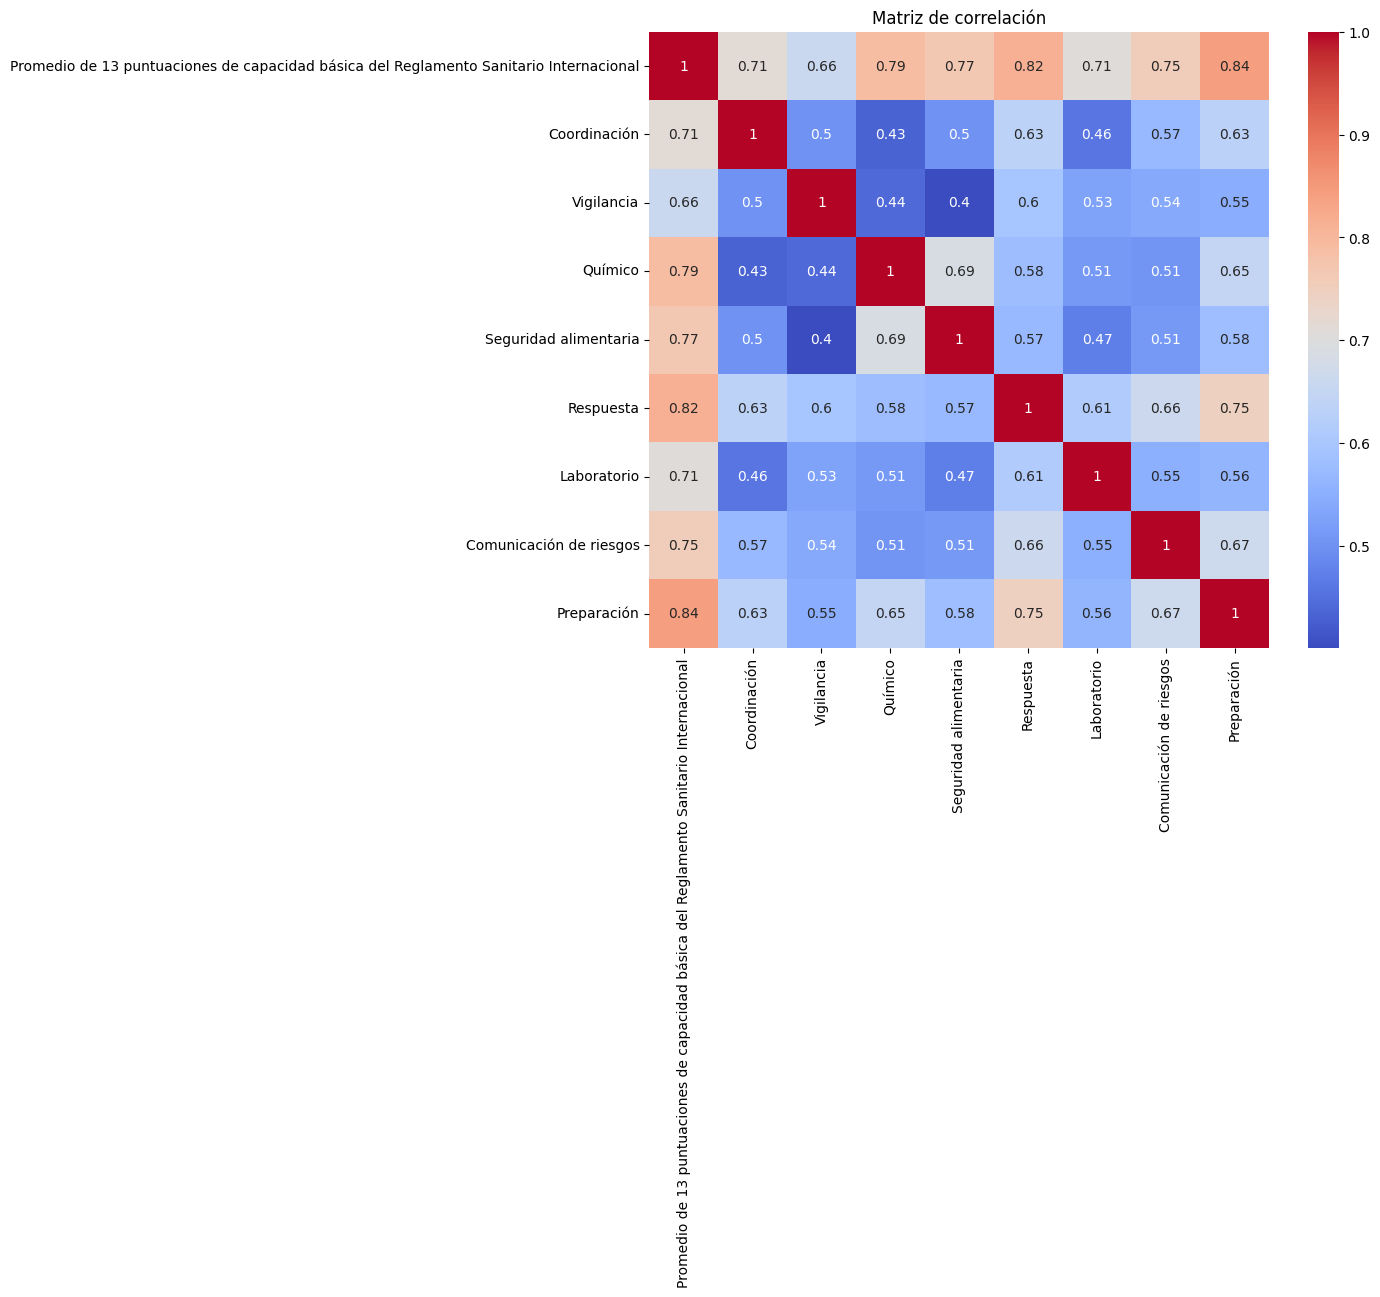

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numerico = data_actual[['Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional',
                          'Coordinación', 'Vigilancia', 'Químico', 'Seguridad alimentaria', 'Respuesta', 'Laboratorio', 'Comunicación de riesgos','Preparación']]
df_numerico.replace('?', pd.NA, inplace=True)

# Matriz de correlación
corr_matrix = df_numerico.corr()

# Mostrar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

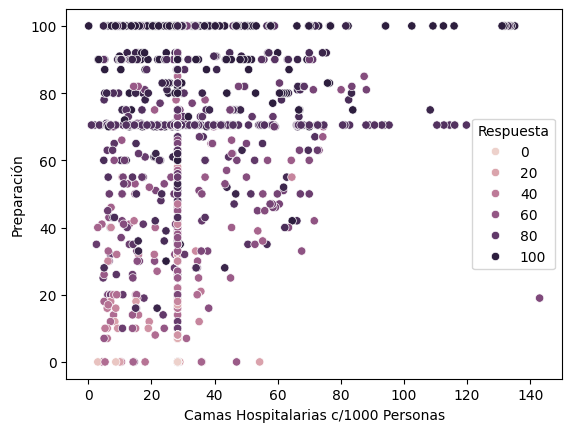

In [15]:
# Gráfico de dispersión coloreado por la variable objetivo
sns.scatterplot(x='Camas Hospitalarias c/1000 Personas', y='Preparación', hue='Respuesta', data=data_actual)
plt.show()

# PCA

<ipython-input-16-042660f8e3c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico.replace('?', pd.NA, inplace=True)


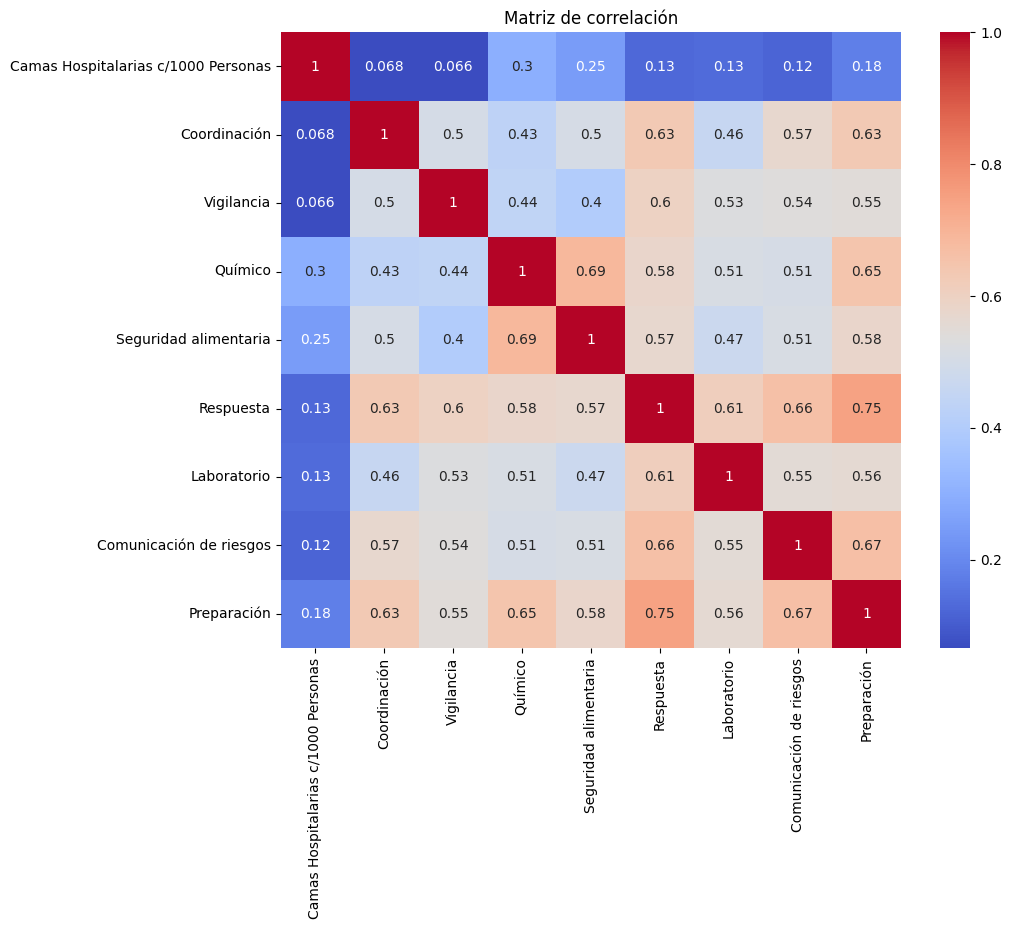

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numerico = data_actual[['Camas Hospitalarias c/1000 Personas',
                          'Coordinación', 'Vigilancia', 'Químico', 'Seguridad alimentaria', 'Respuesta', 'Laboratorio', 'Comunicación de riesgos','Preparación']]
df_numerico.replace('?', pd.NA, inplace=True)

# Matriz de correlación
corr_matrix = df_numerico.corr()

# Mostrar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se revisa correlación entre variables numéricas ya que aquellas variables con valores decimales no entran en capacidad para evaluar correlación.

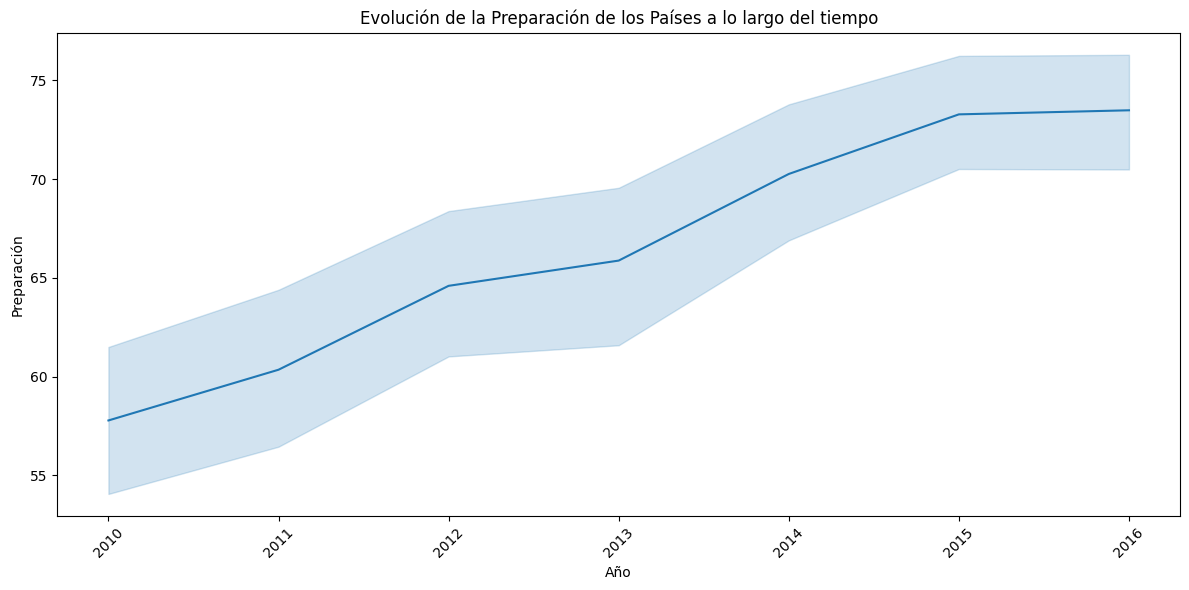

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear un gráfico de líneas para mostrar la evolución de un atributo a lo largo de los años por país
sns.lineplot(x='AÑO', y='Preparación', data=data_actual)

# Añadir etiquetas y título
plt.title('Evolución de la Preparación de los Países a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Preparación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [18]:
!pip install openpyxl
import pandas as pd
# Descargar data actual
data_actual.to_csv('data_actual.csv', index=False)

data_actual.to_excel('data_actual.xlsx', index=False) #Use to_excel instead of to_xlsx

#You will also need to change this line to download the file:
files.download('data_actual.csv')

files.download('data_actual.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

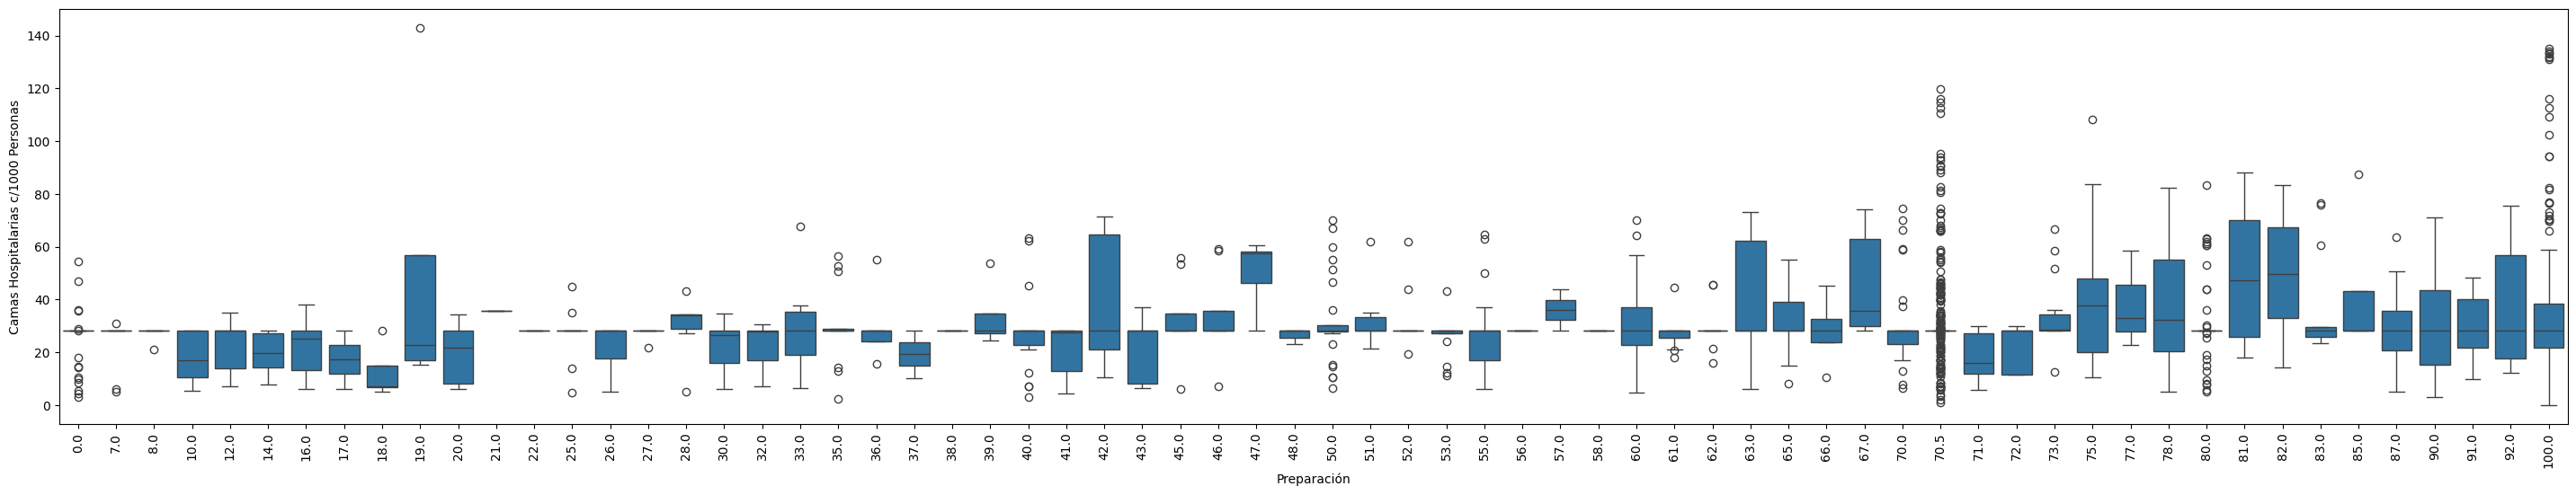

In [19]:
import seaborn as sns

plt.figure(figsize=(36, 6)) # Ajustar el tamaño de la figura

sns.boxplot(x='Preparación', y="Camas Hospitalarias c/1000 Personas", data=data_actual)

plt.xticks(rotation='vertical') # Rotar las etiquetas del eje x

plt.show()

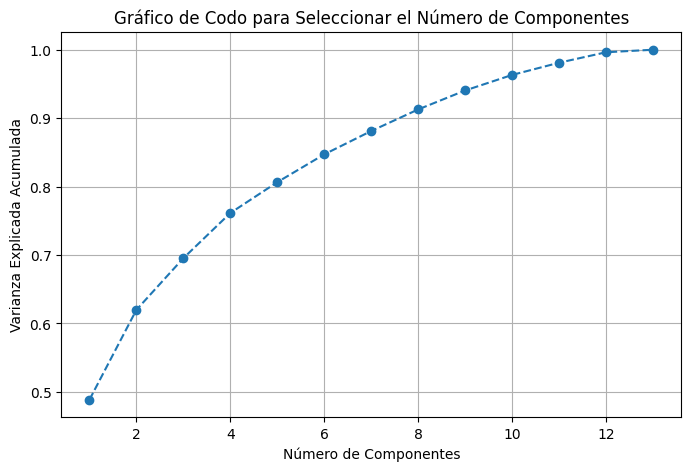

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Estandarizar los datos
scaler = StandardScaler()

# Seleccionar solo columnas numericas de data_actual
numeric_columns = data_actual.select_dtypes(include=np.number).columns

# Usar solo columnas numericas para el escalado
data_scaled = scaler.fit_transform(data_actual[numeric_columns]) # Escalar columnas numericas

# Aplicar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(data_scaled)

# Calcular la varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfico de Codo para Seleccionar el Número de Componentes')
plt.grid()
plt.show()

Como resultado del grafico para verificar el número de componentes, se utilizaran 10 componentes en el análisis PCA, pudiendo explicar una varianza acumulada cercana al 96%.

In [21]:
pca = PCA(n_components=8)
pca_result = pca.fit_transform(data_scaled)

# DataFrame con las cargas de los componentes
# Se corrige el rango del index para que coincida con el número de componentes (8)
# Se utiliza numeric_columns para que las columnas coincidan con las del análisis (13)
cargas_df = pd.DataFrame(pca.components_, columns=numeric_columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(cargas_df)

          AÑO  Camas Hospitalarias c/1000 Personas  \
PC1  0.111341                             0.103500   
PC2 -0.209914                             0.339872   
PC3  0.678428                            -0.511359   
PC4  0.651178                             0.669457   
PC5  0.107901                            -0.390195   
PC6 -0.185667                            -0.055341   
PC7 -0.104096                            -0.017149   
PC8 -0.007685                            -0.053848   

     Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional  \
PC1                                           0.385339                                        
PC2                                          -0.054740                                        
PC3                                          -0.050470                                        
PC4                                          -0.032994                                        
PC5                                   

Variables a considerar para eliminación:

**'Preparación'**
Justificación: Tiene cargas bajas en los primeros tres componentes principales (PC1, PC2, PC3), que explican gran parte de la varianza (alrededor del 75%). Esto sugiere que no contribuye significativamente a los componentes que capturan la mayor variabilidad de los datos.

**'Cobertura de tratamiento de Tuberculosis'**
Justificación: Aunque tiene una carga notable en PC5, su contribución a los primeros tres componentes es baja. Dado que los primeros componentes explican la mayor parte de la varianza, su relevancia es menor.

**'Coordinación'**
Justificación: Las cargas en los primeros tres componentes son moderadas o bajas, lo que indica que no contribuye de manera significativa a las principales fuentes de variación de los datos.

**'Químico'**
Justificación: Tiene cargas bajas en PC1 y PC2 y una contribución variable en los demás componentes, lo cual sugiere que no aporta de manera uniforme a los componentes principales.

**'Respuesta'**
Justificación: Sus cargas en los primeros componentes son bajas o moderadas, lo que indica que no es fundamental para la variabilidad capturada por los principales componentes.

In [22]:
# Eliminar las columnas
data_final = data_actual.drop(['Preparación','Cobertura de tratamiento de Tuberculosis', 'Químico', 'Coordinación','Comunicación de riesgos', 'Respuesta'], axis=1)
data_final.head()


,AÑO,PAÍS,Incidencia de la tuberculosos (por cada 100000 personas por año),Nuevas infecciones VIH (por cada 1000 personas no infectadas),Médicos (por cada 10000 personas),Personal de enfermería y obsetricia (por cada 10000 personas),Camas Hospitalarias c/1000 Personas,Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional,Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas),Población que utiliza al menos servicios básicos de saneamiento (%),Vigilancia,Seguridad alimentaria,Laboratorio
0,2010,Afghanistan,189,0.07,2.448,23.258,4.300,45.0,253.971100,35.47747,96.0,26.0,45.0
1,2010,Albania,17,0.08,12.494,40.66,29.893,72.0,103.060280,95.17216,85.0,80.0,86.0
2,2010,Algeria,78,0.08,0.31,23.258,28.300,51.0,104.116915,86.97813,64.0,60.0,35.0
3,2010,Andorra,11,0.02,0.31,23.258,28.300,36.0,152.441850,100.00000,68.0,80.0,35.0
4,2010,Angola,384,3.28,0.31,23.258,28.300,72.0,270.244250,41.06079,85.0,80.0,86.0


In [23]:
# nuevo data
df = data_final.copy()



# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular el umbral (ejemplo: promedio) para cada columna numérica
thresholds = df[numeric_columns].mean()

# Definir la función de brote
def determinar_brote_numerico(row):
    condiciones_cumplidas = 0

    # Verificar si los valores superan el umbral
    for col in numeric_columns:
        if row[col] > thresholds[col]:
            condiciones_cumplidas += 1

    # Si una cierta cantidad de variables supera el umbral, considerar como brote
    return 1 if condiciones_cumplidas >= 2 else 0

# Aplicar la función a cada fila
df['Brote'] = df.apply(determinar_brote_numerico, axis=1)

# Verificar resultados
print(df[['AÑO', 'PAÍS', 'Brote']])


       AÑO           PAÍS  Brote
0     2010    Afghanistan      1
1     2010        Albania      1
2     2010        Algeria      0
3     2010        Andorra      1
4     2010         Angola      1
...    ...            ...    ...
1384  2016         Zambia      1
1385  2016       Zimbabwe      1
1386  2014  Liechtenstein      1
1387  2015  Liechtenstein      1
1388  2016  Liechtenstein      1

[1389 rows x 3 columns]


In [28]:
#Nueva data
data_clasiffied = df.copy()
data_clasiffied.head()

# Descargar data actual
data_clasiffied.to_csv('data_clasiffied.csv', index=False)

#You will also need to change this line to download the file:
files.download('data_clasiffied.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# REGRESIÓN LOGÍSTICA
Se aplica modelo de regresión logística

In [ ]:
from sklearn.model_selection import train_test_split

data_reg = data_clasiffied.copy()

# Definir variables independientes (X) y variable dependiente (y)
X = data_reg.drop(['PAÍS','Brote'], axis=1)  # Pass 'PAÍS' and 'Brote' as a list to labels
y = data_reg['Brote']               # Variable dependiente (Adopted)

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
log_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Coeficientes del modelo
coefficients = pd.DataFrame(log_model.coef_.T, X.columns, columns=['Coeficiente'])
print(coefficients)

                                                    Coeficiente
AÑO                                                   -0.005328
Incidencia de la tuberculosos (por cada 100000 ...    -0.003266
Nuevas infecciones VIH (por cada 1000 personas ...    -0.008768
Médicos (por cada 10000 personas)                      0.022806
Personal de enfermería y obsetricia (por cada 1...     0.037010
Camas Hospitalarias c/1000 Personas                    0.063560
Promedio de 13 puntuaciones de capacidad básica...     0.014394
Radio de mortalidad en adultos (Probabilidad de...     0.007750
Población que utiliza al menos servicios básico...     0.005997
Vigilancia                                             0.050756
Seguridad alimentaria                                  0.016375
Laboratorio                                            0.053409


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Crear el DataFrame con los valores reales (y_test) y predichos (y_pred)
comparison_df = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_pred)': y_pred
})

# Añadir una columna que indique si la predicción fue correcta
comparison_df['Es Correcto'] = comparison_df['Valor Real (y_test)'] == comparison_df['Predicción (y_pred)']

# Mostrar las primeras filas del DataFrame
comparison_df.head(100)

,Valor Real (y_test),Predicción (y_pred),Es Correcto
558,1,1,True
168,1,1,True
240,0,1,False
664,1,1,True
271,0,0,True
...,...,...,...
591,1,1,True
828,1,1,True
1345,1,1,True
542,1,1,True


In [ ]:
# Contar la cantidad de predicciones correctas e incorrectas
conteo_resultados = comparison_df['Es Correcto'].value_counts()

# Mostrar el resultado
print(conteo_resultados)

Es Correcto
True     261
False     17
Name: count, dtype: int64


In [ ]:
# Creating metric function
import seaborn as sns
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.9388489208633094


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

Matriz de Confusión:
[[ 11  12]
 [  5 250]]


              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.95      0.98      0.97       255

    accuracy                           0.94       278
   macro avg       0.82      0.73      0.77       278
weighted avg       0.93      0.94      0.93       278



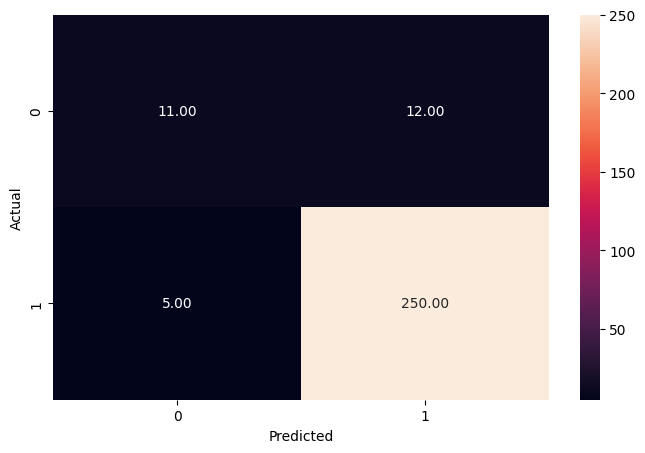

In [ ]:
metrics_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(f'Reporte de Clasificación:\n{class_report}')

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.95      0.98      0.97       255

    accuracy                           0.94       278
   macro avg       0.82      0.73      0.77       278
weighted avg       0.93      0.94      0.93       278



AUC-ROC: 0.9635123614663257


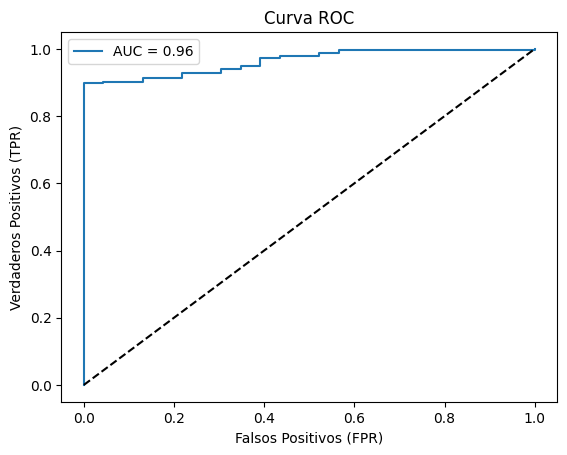

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia (modelo aleatorio)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

Dado que un valor de AUC de 0.5 indica que el modelo no tiene discriminación
(equivalente a una clasificación aleatoria), mientras que un valor
cercano a 1 indica un buen rendimiento, al estar actualmente en un valor AUC-ROC de 0.96 nos encontramos con un modelo de predicción con buen rendimiento.

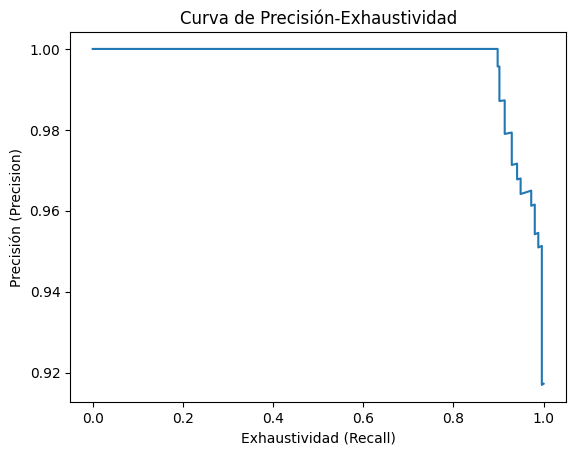

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y exhaustividad para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Graficar la curva de precisión-exhaustividad
plt.plot(recall, precision)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.show()

# DECISION TREE



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_tree = data_clasiffied.copy()

# Convertir columnas categóricas como 'Genre' en variables dummies
X = data_tree.drop(['PAÍS','Brote'], axis=1)
#X = pd.get_dummies(data_tree.drop('Success', axis=1), drop_first=True)  # Eliminamos 'Success' y convertimos las categóricas
y = data_tree['Brote']  # Variable objetivo

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ver las dimensiones del conjunto de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (972, 12)
Tamaño del conjunto de prueba: (417, 12)


In [32]:
# Print the columns of your DataFrame to verify the names
# Definir las características (features) y la variable objetivo (target)

X = df[['Incidencia de la tuberculosos (por cada 100000 personas por año)',
       'Nuevas infecciones VIH (por cada 1000 personas no infectadas) ',
       'Médicos (por cada 10000 personas)',
       'Personal de enfermería y obsetricia (por cada 10000 personas)',
       'Camas Hospitalarias c/1000 Personas',
       'Promedio de 13 puntuaciones de capacidad básica del Reglamento Sanitario Internacional',
       'Radio de mortalidad en adultos (Probabilidad de morir entre los 15 y 60 años por cada 1000 personas)',
       'Población que utiliza al menos servicios básicos de saneamiento (%)',
       'Vigilancia', 'Seguridad alimentaria', 'Laboratorio']]  # Características
y = df['Brote']  # Variable objetivo

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en los datos de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Precisión del Árbol de Decisión: {accuracy * 100:.2f}%')

Precisión del Árbol de Decisión: 97.84%


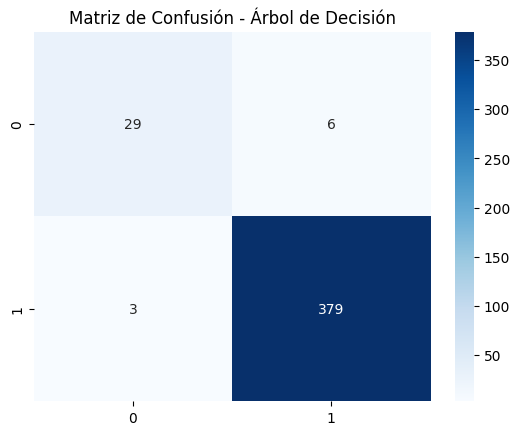

Reporte de Clasificación - Árbol de Decisión
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.98      0.99      0.99       382

    accuracy                           0.98       417
   macro avg       0.95      0.91      0.93       417
weighted avg       0.98      0.98      0.98       417



In [35]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de Confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Clasificación detallada (precision, recall, f1-score)
print('Reporte de Clasificación - Árbol de Decisión')
print(classification_report(y_test, y_pred_tree))

AUC-ROC: 0.9103590127150336


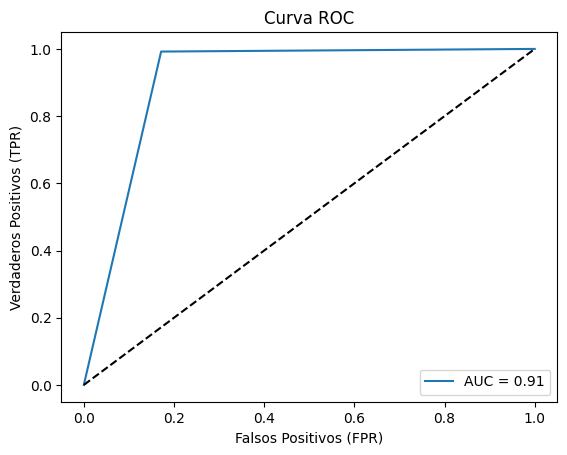

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_tree = tree_model.predict(X_test)

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_tree)
print(f'AUC-ROC: {auc}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia (modelo aleatorio)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

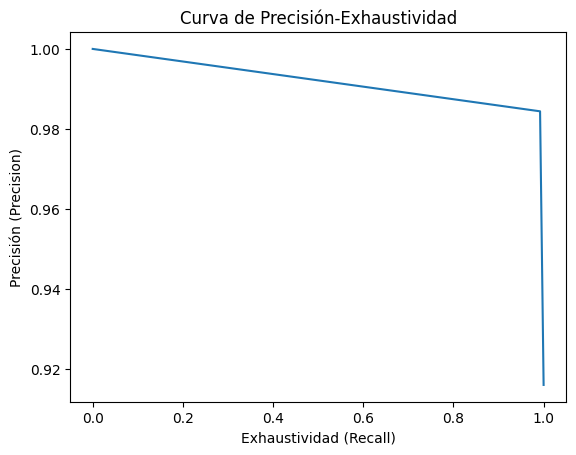

In [39]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y exhaustividad para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_tree)

# Graficar la curva de precisión-exhaustividad
plt.plot(recall, precision)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.show()